In [188]:
%load_ext autoreload
%autoreload 2

from joblib import Parallel, delayed
import multiprocessing

from tqdm import tqdm, tqdm_notebook
from IPython.display import display
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import pickle
import os
import sys
sys.path.append('..')
from helper.orderbook_trader import OrderbookTradingSimulator
from helper.manage_orderbooks import *
from helper.evaluation import evaluate, plot_evaluation_costs
from helper.general_helpers import add_features_to_orderbooks, load_and_preprocess_historyfiles, discretize_hist_feature

from agents.RL_Agent_Base import RLAgent_Base
from agents.BatchTree_Agent import RLAgent_BatchTree
from agents.QTable_Agent import QTable_Agent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load pretrained Agents

In [2]:
folder = 'trainedAgents/longterm_apr_BT/'
agent_files = sorted([(f, folder) for f in os.listdir(folder) if f.endswith('.json')])
# agent_files = [(f, folder) for (f, folder) in agent_files if '_a_' in f]

# agent_files.append( ('QTable_1611-1704_T4_I8_VolTime.json', 'trainedAgents/longterm_1611_1704_simulate_preceeding_trades') )

print(agent_files)

#agent_files = [('BT_Agent_samples36892.json', 'trainedAgents/longterm_BT')]

[('BT_Agent_samples20196.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_samples36973.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_samples43268.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples116008.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples134011.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples152352.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples170605.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples188224.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples206409.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples224083.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples242342.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples25078.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples261018.json', 'trainedAgents/longterm_apr_BT/'), ('BT_Agent_shuffle_samples279347.json', 'trainedAgen

In [5]:
# agent = RLAgent_Base.load(agent_name='BT_Agent_samples36973', path=folder, ignore_samples=False)
agent = RLAgent_Base.load(agent_name='BT_Agent_shuffle_samples61103', path=folder, ignore_samples=False)

In [ ]:
agent.heatmap_Q(extra_variables={'orderbook': data_may[-1][0]})

In [ ]:
agent.heatmap_Q(extra_variables={'orderbook': data_may[0][0]})

In [ ]:
agent.heatmap_Q(extra_variables={'orderbook': data_may[-1][0]})

In [ ]:
agent.heatmap_Q(extra_variables={'orderbook': data_may[0][0]})

In [6]:
agent_collection = {}
try:
    agent_collection
except NameError:
    agent_collection = {}
    
for elem, folder in agent_files:
    name = elem[:-5]
    agent_collection[name] = RLAgent_Base.load(agent_name=name, path=folder, ignore_samples=True)
    print(agent_collection[name])
#agent_collection['VolTime'] = RLAgent_Base.load(agent_name='QTable_1611-1704_T4_I8_VolTime', path=folder_orig, ignore_samples=True)
print("agent_collection contains {} elements:\n{}".format(len(agent_collection), list(agent_collection.keys())))


RL-Type: <class 'agents.BatchTree_Agent.RLAgent_BatchTree'>, Name: 'BT_Agent_samples20196', state_variables: '['volume', 'time', 'level2data']'
RL-Type: <class 'agents.BatchTree_Agent.RLAgent_BatchTree'>, Name: 'BT_Agent_samples36973', state_variables: '['volume', 'time', 'level2data']'
RL-Type: <class 'agents.BatchTree_Agent.RLAgent_BatchTree'>, Name: 'BT_Agent_samples43268', state_variables: '['volume', 'time', 'level2data']'
RL-Type: <class 'agents.BatchTree_Agent.RLAgent_BatchTree'>, Name: 'BT_Agent_shuffle_samples116008', state_variables: '['volume', 'time', 'level2data']'
RL-Type: <class 'agents.BatchTree_Agent.RLAgent_BatchTree'>, Name: 'BT_Agent_shuffle_samples134011', state_variables: '['volume', 'time', 'level2data']'
RL-Type: <class 'agents.BatchTree_Agent.RLAgent_BatchTree'>, Name: 'BT_Agent_shuffle_samples152352', state_variables: '['volume', 'time', 'level2data']'
RL-Type: <class 'agents.BatchTree_Agent.RLAgent_BatchTree'>, Name: 'BT_Agent_shuffle_samples170605', state_va

In [ ]:
agent_source = agent_collection['BT_Agent_samples36892']

In [ ]:
agent_collection['BT_VolTime'].heatmap_Q(outfile='BT_VolTimeSpread_3_vol24', vol_intervals=24)
agent_collection['BT_VolTime'].heatmap_Q(outfile='BT_VolTimeSpread_3_vol08', vol_intervals=8)
agent_collection['BT_VolTime'].heatmap_Q(outfile='BT_VolTimeSpread_3_vol4', vol_intervals=4)

In [ ]:
agent_new = agent_source.copy(new_name='BT_Agent_copy')
agent_new.samples.head()

In [ ]:
# source_agent = agent_collection['QTable_1612-1702_T4_I8']
# print("Samples:", source_agent.samples.shape)
# tet = source_agent.convert_to_BatchTreeAgent(new_name="te", train=True)
# print(tet)
# print(source_agent.state_variables)
# agent_collection = {
#     'source_agent': source_agent,
#     'converted_agent': tet
# }

In [ ]:
hist = pd.read_csv('ob_features70000_1611_1705_level2data.csv', index_col=0, parse_dates=[0])
hist.spread.describe()

In [ ]:
agent = agent_collection['BT_VolTimeSpread']
for d in 1.435976e-03, 1.605005e-03, 2.617836e-03:
    print(d)
    agent.heatmap_Q(extra_variables={'spread': 0.0012})

In [ ]:
agent.model.feature_importances_

### Load data

In [ ]:
variables = []
for ag in agent_collection.values():
    print(ag, ag.state_variables)
    variables += ag.state_variables
variables = set(variables)
variables.remove('time')
variables.remove('volume')
#variables = [v[:-5] for v in variables]
variables

In [ ]:
hist._a_4

In [ ]:
hist.columns

In [ ]:
hist = pd.read_csv('ob_features70000_1611_1705_level2data.csv', index_col=0, parse_dates=[0])
variables_disc = [(v[:-6], v[-1]) for v in variables if '_disc' in v]

for feat, bins in tqdm(variables_disc):
    hist = discretize_hist_feature(hist, feature=feat, test_start_date='2017-05-01', bins=int(bins))
display(hist.head(3))

In [ ]:
data_mini = pickle.load( open( "cached_windows/tradingwindows_1611_USTD_BTC_20.p", "rb" ) )
num_cores = multiprocessing.cpu_count()
data_mini = Parallel(n_jobs=num_cores, verbose=10)(delayed(add_features_to_orderbooks)(orderbooks=window, hist=hist,
                                                                                      features=variables,
                                                                                      fixedMarketVariables=True) 
                                                 for window in data_mini[:])
print(len(data_mini), len(data_mini[0]))
data = data_mini

In [ ]:
data_nov = pickle.load( open( '../cached_windows_60mins/obs_2016-11_USDT_BTC_maxVol100.p', "rb" ) )
print(len(data_nov))
print(data_nov[0][0])
num_cores = multiprocessing.cpu_count()
data_nov = Parallel(n_jobs=num_cores, verbose=10)(delayed(add_features_to_orderbooks)(
    orderbooks=window, 
    hist=hist,
    features=variables) 
                                                  for window in data_nov[:192])
print(len(data_nov))
data_nov[0][0]

In [ ]:
data_dec = pickle.load( open( '../cached_windows_60mins/obs_2016-12_USDT_BTC_maxVol100.p', "rb" ) )
print(len(data_dec))
print(data_dec[0][0])
num_cores = multiprocessing.cpu_count()
data_dec = Parallel(n_jobs=num_cores, verbose=10)(delayed(add_features_to_orderbooks)(
    orderbooks=window, 
    hist=hist,
    features=["{}_disc".format(v) for v in variables]) 
                                                 for window in data_dec[:192])
print(len(data_dec))
data_dec[0][0]

In [ ]:
data_apr = pickle.load( open( '../cached_windows_60mins_V200/obs_2017-04_USDT_BTC_maxVol200.p', "rb" ) )
print(len(data_apr))
print(data_apr[0][0])
num_cores = multiprocessing.cpu_count()
data_apr = Parallel(n_jobs=num_cores, verbose=10)(delayed(add_features_to_orderbooks)(
    orderbooks=window, 
    hist=hist,
    features=variables) 
                                                 for window in data_apr[:])
pickle.dump(data_apr, open("data_apr_enriched.p", "wb"))

In [ ]:
pickle.dump(data_apr1 + data_apr2, open("data_apr_enriched.p", "wb"))

In [ ]:
print("x")

In [ ]:
variables

In [ ]:
data_may = pickle.load( open( '../cached_windows_60mins_V200/obs_2017-05_USDT_BTC_maxVol200.p', "rb" ) )
print(len(data_may))
print(data_may[0][0])
num_cores = multiprocessing.cpu_count()
data_may = Parallel(n_jobs=num_cores, verbose=10)(delayed(add_features_to_orderbooks)(
    orderbooks=window, 
    hist=hist,
    features=variables,
    fixedMarketVariables=False) 
                                                 for window in data_may[:])
data_may[0][0]
# pickle.dump(data_may, open("data_may_enriched.p", "wb"))   # data_may_fixedMarketVar, data_may_enriched

In [ ]:
pickle.dump(data_may, open("data_may_SpreadLevel2.p", "wb"))   # data_may_fixedMarketVar, data_may_enriched

### Evaluate

In [ ]:
# data_may = pickle.load(open("data_may_enriched.p", "rb"))
# data_may = pickle.load(open("data_may_fixedMarketVar.p", "rb"))
data_may = pickle.load(open("data_may_SpreadLevel2.p", "rb"))

In [ ]:
for ag in agent_collection:
    print(ag, agent_collection[ag].agent_name)

In [ ]:
list(agent_collection.keys())[0]

In [ ]:
data = data_may
baseline = list(agent_collection.keys())[0]

costs, slippage = evaluate(
    testdata=data,
    agents=agent_collection,
    baseline=baseline,
    evaluate_actions=[2],
    verbose=False,
)
slippage.to_csv('slippage_may_ForwardBT.csv')

In [ ]:
columns = [
       'QTable_1611_T4_I8_VolTime_center_orig_disc3',
       'QTable_1611_T4_I8_VolTime_center_orig_disc5',
       'QTable_1611_T4_I8_VolTime_center_orig_disc9',
#       'QTable_1611_T4_I8_VolTime_marketPrice_buy_worst',
       'QTable_1611_T4_I8_VolTime_marketPrice_buy_worst_disc3',
       'QTable_1611_T4_I8_VolTime_marketPrice_buy_worst_disc5',
       'QTable_1611_T4_I8_VolTime_marketPrice_buy_worst_disc9',
       'QTable_1611_T4_I8_VolTime_marketPrice_sell_worst_disc3',
       'QTable_1611_T4_I8_VolTime_marketPrice_sell_worst_disc5',
       'QTable_1611_T4_I8_VolTime_marketPrice_sell_worst_disc9',
#       'QTable_1611_T4_I8_VolTime_marketPrice_spread',
       'QTable_1611_T4_I8_VolTime_marketPrice_spread_disc3',
       'QTable_1611_T4_I8_VolTime_marketPrice_spread_disc5',
       'QTable_1611_T4_I8_VolTime_marketPrice_spread_disc9',
       'QTable_1611_T4_I8_VolTime_maxSlip_imbalance_disc3',
       'QTable_1611_T4_I8_VolTime_maxSlip_imbalance_disc5',
       'QTable_1611_T4_I8_VolTime_maxSlip_imbalance_disc9',
       'QTable_1611_T4_I8_VolTime_sharecount_buy_disc3',
       'QTable_1611_T4_I8_VolTime_sharecount_buy_disc5',
       'QTable_1611_T4_I8_VolTime_sharecount_buy_disc9',
       'QTable_1611_T4_I8_VolTime_sharecount_imbalance_disc3',
       'QTable_1611_T4_I8_VolTime_sharecount_imbalance_disc5',
       'QTable_1611_T4_I8_VolTime_sharecount_imbalance_disc9',
       'QTable_1611_T4_I8_VolTime_sharecount_sell_disc3',
       'QTable_1611_T4_I8_VolTime_sharecount_sell_disc5',
       'QTable_1611_T4_I8_VolTime_sharecount_sell_disc9',
       'QTable_1611_T4_I8_VolTime_sharecount_spread_disc3',
       'QTable_1611_T4_I8_VolTime_sharecount_spread_disc5',
       'QTable_1611_T4_I8_VolTime_sharecount_spread_disc9',
#       'QTable_1611_T4_I8_VolTime_spread',
       'QTable_1611_T4_I8_VolTime_spread_disc3',
       'QTable_1611_T4_I8_VolTime_spread_disc5',
       'QTable_1611_T4_I8_VolTime_spread_disc9', 
        'QTable_1611_T4_I8_VolTime_ob_direction_disc3',
       'QTable_1611_T4_I8_VolTime_ob_direction_disc5',
       'QTable_1611_T4_I8_VolTime_ob_direction_disc9',
#        'QTable_1611_T4_I8_VolTime_future_center5_disc3',
#        'QTable_1611_T4_I8_VolTime_future_center5_disc5',
# #       'QTable_1611_T4_I8_VolTime_future_center5_disc9',
#         'QTable_1611_T4_I8_VolTime_future_center15_disc3',
#        'QTable_1611_T4_I8_VolTime_future_center15_disc5',
#        'QTable_1611_T4_I8_VolTime_future_center15_disc9',
#        'QTable_1611_T4_I8_VolTime_future_center60_disc3',
#        'QTable_1611_T4_I8_VolTime_future_center60_disc5',
#        'QTable_1611_T4_I8_VolTime_future_center60_disc9',
#    'VolTime_fixed'
]

#columns = [c for c in columns if 'disc5' in c] 
for i in range(len(columns)):
    if 'QTable_1611' in columns[i]:
         columns[i] = "QTable_1611-1704" + columns[i][11:]
display(columns)
#columns.remove('QTable_1611-1704_T4_I8_VolTime_ob_direction_disc3')
# columns.remove('QTable_1611-1704_T4_I8_VolTime_ob_direction_disc3')
#columns.remove('QTable_1611-1704_T4_I8_VolTime_ob_direction_disc9')

In [ ]:
agent_collection['BT_Agent_samples36973'].state_variables

In [ ]:
slippage.plot()

In [ ]:
slippage.columns

In [9]:
slippage.columns[:-4]

Index(['BT_Agent_shuffle_samples25078', 'BT_Agent_shuffle_samples43334',
       'BT_Agent_shuffle_samples61103', 'BT_Agent_shuffle_samples79809',
       'BT_Agent_shuffle_samples97615', 'BT_Agent_shuffle_samples116008',
       'BT_Agent_shuffle_samples134011', 'BT_Agent_shuffle_samples152352',
       'BT_Agent_shuffle_samples170605', 'BT_Agent_shuffle_samples188224',
       'BT_Agent_shuffle_samples206409', 'BT_Agent_shuffle_samples224083',
       'BT_Agent_shuffle_samples242342'],
      dtype='object')

In [189]:
slippage = pd.read_csv('slippage_may_BT_shuffle.csv', index_col=0)  # slippage_may_manyVars3Bins, slippage_may_manyVars3Bins_fixedMarketVar
slippage = slippage[[
    'BT_Agent_shuffle_samples25078', 
    'BT_Agent_shuffle_samples43334',
    'BT_Agent_shuffle_samples61103', 
    'BT_Agent_shuffle_samples79809',
    'BT_Agent_shuffle_samples97615',
    'BT_Agent_shuffle_samples116008', 
    'BT_Agent_shuffle_samples134011',
    'BT_Agent_shuffle_samples152352', 
    'BT_Agent_shuffle_samples170605',
    'BT_Agent_shuffle_samples188224', 
    'BT_Agent_shuffle_samples206409',
    'BT_Agent_shuffle_samples224083', 
    'BT_Agent_shuffle_samples242342',
    'BT_Agent_shuffle_samples261018',
    'BT_Agent_shuffle_samples279347', 
    'BT_Agent_shuffle_samples298020',
    'BT_Agent_shuffle_samples304406',
]]
#slippage = slippage[columns]
tmp = pd.read_csv('slippage_may_BT36973apr.csv', index_col=0)
slippage.insert(slippage.shape[1], 'BT_Agent_samples36973', tmp['BT_Agent_samples36973'])

tmp = pd.read_csv('Thesis_Experiments/actions_slippage_may.csv', index_col=0)
slippage.insert(slippage.shape[1], 'VolTime', tmp['VolTime'])
#del(slippage['2'])
slippage.insert(slippage.shape[1], '2', tmp['2'])
slippage.insert(slippage.shape[1], '4', tmp['4'])
slippage.insert(slippage.shape[1], 'MarketOrder', tmp['MarketOrder'])



#print([slippage.columns[:2] + c[31:] for c in slippage.columns[2:]] + list(slippage.columns[-4:]))
#slippage.columns = [c[31:] for c in slippage.columns[:-4]] + list(slippage.columns[-4:])

plot_evaluation_costs(slippage.iloc[:,:], hline="VolTime", showfliers=False, ylim=(0,350), verbose=True)

ValueError: cannot insert 2, already exists

In [ ]:
len(data_may)

In [ ]:
slippage['2']

In [ ]:
slippage = pd.read_csv('slippage_apr_manyVars3Bins.csv', index_col=0)
tmp = pd.read_csv('Thesis_Experiments/actions_slippage_apr.csv', index_col=0)
slippage.insert(0, 'VolTime', tmp['VolTime'])
slippage.insert(slippage.shape[1], 'MarketOrder', tmp['MarketOrder'])
display(slippage.head())
plot_evaluation_costs(slippage, hline="VolTime", showfliers=False, ylim=(0,250))

In [ ]:
plot_episode(data_dec[62], limits=[765.527563, 767.819562, 769.347561, 770.875560], consume='volume', volume=100)
#plot_episode(data_dec[62], limits=[765.527563, 767.819562, 769.347561, 770.875560], consume='cash', volume=70000)

## Check for best S&L Strategy over training data (Nov16-Jan17)

In [ ]:
costs_list_train = pd.concat([
    pd.read_csv("../Runs/evaluation/Evaluation_obs_TRAINSET_2016-11_USDT_BTC.csv", index_col=0),
    pd.read_csv("../Runs/evaluation/Evaluation_obs_TRAINSET_2016-12_USDT_BTC.csv", index_col=0),
    pd.read_csv("../Runs/evaluation/Evaluation_obs_TRAINSET_2017-01_USDT_BTC.csv", index_col=0)])

plot_experiment_results(costs_list_train, name='Trainset (USDT-BTC)', ylim=(-1.5, 1.5))

mean = costs_list_train.mean()
print("Minimal costs reached by S&L strategy: '{}': {:1.4f}".format(mean.argmin(), mean.min()))

### Compare strategies on Testset (Feb2017)

In [ ]:
T = ql.T
V = ql.V
period_length = ql.period_length
print("V={}, T={}, period_length={}".format(V, T, period_length))

costs_list = run_Q(V=100, H=T*period_length, T=T, ql=ql,
                   episode_windows=episodes_test[:5], actions=actions)

In [ ]:
plot_experiment_results(costs_list, name='Trainset (USDT-BTC)')  #, ylim=(-1.5, 1.5))
mean = costs_list_train.mean()
print("Minimal costs reached by S&L strategy: '{}': {:1.4f}".format(mean.argmin(), mean.min()))

Float64Index([116008.0, 134011.0, 152352.0, 170605.0, 188224.0, 206409.0,
              224083.0, 242342.0,  25078.0, 261018.0, 279347.0, 298020.0,
              304406.0,  43334.0,  61103.0,  79809.0,  97615.0],
             dtype='float64')


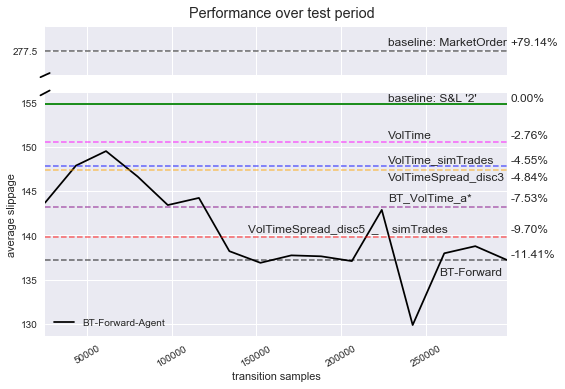

In [187]:
slippage = pd.read_csv('slippage_may_BT_shuffle.csv', index_col=0)
slippage = slippage.iloc[:,:17]
slippage.columns = [col[24:] for col in slippage.columns]
slippage.columns = [float(col) for col in slippage.columns[:]]
print(slippage.columns)
slippage = slippage[[25078, 43334, 61103, 79809, 97615, 116008, 134011, 152352, 170605, 188224, 206409, 224083, 242342, 261018, 279347, 298020]].iloc[:640,:]


f,(ax1,ax2) = plt.subplots(2,1,sharex=True, facecolor='w', gridspec_kw = {'height_ratios':[1, 5]})
slippage.mean().plot(rot=30, label='BT-Forward-Agent', color='black')
plt.ylabel("average slippage")
plt.xlabel("transition samples")

ax1.axhline(277.49, alpha=0.5, linestyle='--', color='black')
ax2.axhline(154.9 , alpha=1,  color='green')
ax2.axhline(150.63, alpha=0.5, linestyle='--', color='magenta')
ax2.axhline(147.86, alpha=0.5, linestyle='--', color='blue')
ax2.axhline(143.24, alpha=0.5, linestyle='--', color='purple')
ax2.axhline(139.87, alpha=0.5, linestyle='--', color='red')
ax2.axhline(147.41, alpha=0.5, linestyle='--', color='orange')
ax2.axhline(137.23, alpha=0.5, linestyle='--', color='black')

offset = 228000
ax2.text(s="baseline: S&L '2'", x=offset, y=155.2)
ax2.text(s="0.00%", x=300000, y=155.2)
ax2.text(s="VolTime", x=offset, y=151)
ax2.text(s="-2.76%", x=300000, y=151)
ax2.text(s="VolTime_simTrades", x=offset, y=148.2)
ax2.text(s="-4.55%", x=300000, y=148.2)
ax2.text(s="BT_VolTime_a*", x=offset, y=143.8)
ax2.text(s="-7.53%", x=300000, y=143.8)

ax2.text(s="VolTimeSpread_disc3", x=offset, y=146.2)
ax2.text(s="-4.84%", x=300000, y=146.2)

ax2.text(s="VolTimeSpread_disc5  _    simTrades", x=145000, y=140.3)
ax2.text(s="-9.70%", x=300000, y=140.3)

ax1.text(s="baseline: MarketOrder", x=offset, y=278)
ax1.text(s="+79.14%", x=300000, y=278)
ax2.text(s="BT-Forward", x=258000, y=135.5)
ax2.text(s="-11.41%", x=300000, y=137.5)
plt.legend()

ax1.set_ylim((275, 280))
# hide the spines between ax and ax2
#ax1.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)
#ax1.yaxis.tick_left()
#ax1.tick_params(labelright='off')
#ax2.yaxis.tick_right()

d = .01 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax2.plot((-d,+d), (-d,+d), **kwargs)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
#ax1.plot((-d,+d), (1-d,1+d), **kwargs)
ax1.plot((-d,+d), (-4.3*d,+4.3*d), **kwargs)
#plt.title("x")
f.suptitle("Performance over test period")
plt.subplots_adjust(hspace = .05)
plt.tight_layout()
ax1.set_yticklabels(["", 277.5])
plt.subplots_adjust(top=0.93)
plt.subplots_adjust(right=0.89)
plt.savefig("BT_Forward_Performance.pdf")
plt.show()

### USDT ETH

7


,slippage,med,std,perf_5,perf_7,perf_M
5,696.97,351.39,1665.40,0.00%,9.20%,-63.44%
7,638.27,514.63,1064.03,-8.42%,0.00%,-66.52%
BT_Agent_shuffle_samples10629,767.54,32.03,2673.78,10.12%,20.25%,-59.74%
BT_Agent_shuffle_samples11996,756.17,47.65,2684.58,8.49%,18.47%,-60.34%
BT_Agent_shuffle_samples13340,776.87,17.70,2520.65,11.46%,21.72%,-59.25%
BT_Agent_shuffle_samples14764,715.06,101.64,2305.79,2.59%,12.03%,-62.49%
BT_Agent_shuffle_samples16233,745.87,25.10,2463.12,7.01%,16.86%,-60.88%
BT_Agent_shuffle_samples17775,785.54,74.09,2227.42,12.71%,23.07%,-58.80%
BT_Agent_shuffle_samples1908,1035.62,-125.20,3165.01,48.59%,62.26%,-45.68%
BT_Agent_shuffle_samples19245,744.78,10.63,2420.80,6.86%,16.69%,-60.93%


\begin{tabular}{lrrrlll}
\toprule
{} &  slippage &      med &      std &   perf\_5 &   perf\_7 &   perf\_M \\
\midrule
5                             &    696.97 &   351.39 &  1665.40 &    0.00\% &    9.20\% &  -63.44\% \\
7                             &    638.27 &   514.63 &  1064.03 &   -8.42\% &    0.00\% &  -66.52\% \\
BT\_Agent\_shuffle\_samples10629 &    767.54 &    32.03 &  2673.78 &   10.12\% &   20.25\% &  -59.74\% \\
BT\_Agent\_shuffle\_samples11996 &    756.17 &    47.65 &  2684.58 &    8.49\% &   18.47\% &  -60.34\% \\
BT\_Agent\_shuffle\_samples13340 &    776.87 &    17.70 &  2520.65 &   11.46\% &   21.72\% &  -59.25\% \\
BT\_Agent\_shuffle\_samples14764 &    715.06 &   101.64 &  2305.79 &    2.59\% &   12.03\% &  -62.49\% \\
BT\_Agent\_shuffle\_samples16233 &    745.87 &    25.10 &  2463.12 &    7.01\% &   16.86\% &  -60.88\% \\
BT\_Agent\_shuffle\_samples17775 &    785.54 &    74.09 &  2227.42 &   12.71\% &   23.07\% &  -58.80\% \\
BT\_Agent\_shuffle\_samples1908  &   10

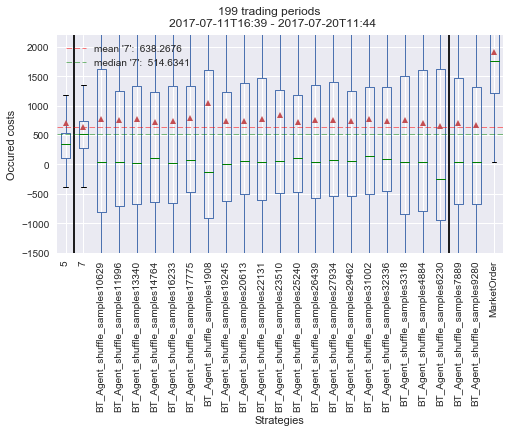

In [272]:
slippage = pd.read_csv('slippage_USDTETH_shuffle.csv', index_col=0)  # slippage_may_manyVars3Bins, slippage_may_manyVars3Bins_fixedMarketVar
slippage = slippage[sorted(slippage.columns)]
plot_evaluation_costs(slippage.iloc[:,:], hline="7", showfliers=False, verbose=True, ylim=(-1500, 2200))

Float64Index([ 1908.0,  3318.0,  4884.0, 10629.0, 11996.0, 13340.0, 14764.0,
              16233.0, 17775.0, 19245.0, 20613.0, 22131.0, 23510.0, 25240.0,
              26439.0, 27934.0, 29462.0, 31002.0, 32336.0, 33695.0, 35006.0,
              36347.0, 37802.0, 39540.0, 40814.0, 42219.0, 43679.0, 45103.0,
              46465.0, 47957.0],
             dtype='float64')


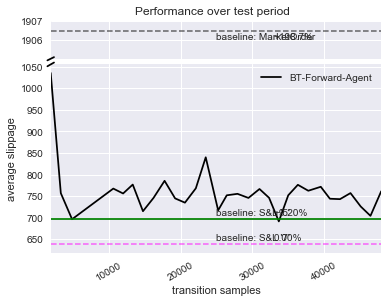

In [280]:
slippage = pd.read_csv('slippage_USDTETH_shuffle.csv', index_col=0)
slippage = slippage.iloc[:,:30]

slippage.columns = [col[24:] for col in slippage.columns]
slippage.columns = [float(col) for col in slippage.columns[:]]

slippage = slippage[sorted(slippage.columns)]
print(slippage.columns)

f,(ax1,ax2) = plt.subplots(2,1,sharex=True, facecolor='w', gridspec_kw = {'height_ratios':[1, 5]})
slippage.mean().plot(rot=30, label='BT-Forward-Agent', color='black')


plt.ylabel("average slippage")
plt.xlabel("transition samples")

ax1.axhline(1906.48, alpha=0.5, linestyle='--', color='black')
ax2.axhline(696.97 , alpha=1,  color='green')
ax2.axhline(638.27, alpha=0.5, linestyle='--', color='magenta')
# ax2.axhline(147.86, alpha=0.5, linestyle='--', color='blue')
# ax2.axhline(143.24, alpha=0.5, linestyle='--', color='purple')
# ax2.axhline(139.87, alpha=0.5, linestyle='--', color='red')
# ax2.axhline(147.41, alpha=0.5, linestyle='--', color='orange')
# ax2.axhline(137.23, alpha=0.5, linestyle='--', color='black')
# 
offset = 25000
offset2 = 33000
ax2.text(s="baseline: S&L '5'", x=offset, y=705)
ax2.text(s="+9.20%", x=offset2, y=705)
ax2.text(s="baseline: S&L '7'", x=offset, y=647)
ax2.text(s="0.00%", x=offset2, y=647)

ax1.text(s="baseline: MarketOrder", x=offset, y=1906)
ax1.text(s="+198.7%", x=offset2, y=1906)
# ax2.text(s="BT-Forward", x=258000, y=135.5)
# ax2.text(s="-11.41%", x=300000, y=137.5)
plt.legend()

ax1.set_ylim((1905, 1907))

d = .01 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
#ax2.plot((-d,+d), (-d,+d), **kwargs)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
#ax1.plot((-d,+d), (1-d,1+d), **kwargs)
ax1.plot((-d,+d), (-4.3*d,+4.3*d), **kwargs)
#plt.title("x")
f.suptitle("Performance over test period")
plt.subplots_adjust(hspace = .05)

ax1.set_yticklabels(["", 1906, 1907])
plt.subplots_adjust(top=0.93)
plt.subplots_adjust(right=0.89)
plt.savefig("BT_Forward_Performance_USDTETH.pdf")
plt.show()